# ENDTERM Data Visualization <hr style="border:2.5px solid #126782"></hr>

Name: **Aleja Villegas** <br>
Course: **CPE2A**

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"..\raw\spotifydata-cleaned.csv", delimiter = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10131 entries, 0 to 10130
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      10131 non-null  float64
 1   Energy            10131 non-null  float64
 2   Key               10131 non-null  float64
 3   Loudness          10131 non-null  float64
 4   Mode              10131 non-null  float64
 5   Speechiness       10131 non-null  float64
 6   Acousticness      10131 non-null  float64
 7   Instrumentalness  10131 non-null  float64
 8   Liveness          10131 non-null  float64
 9   Valence           10131 non-null  float64
 10  Tempo             10131 non-null  float64
 11  Type              10130 non-null  object 
 12  id                10130 non-null  object 
 13  uri               10130 non-null  object 
 14  track_href        10130 non-null  object 
 15  analysis_url      10130 non-null  object 
 16  Duration (ms)     10131 non-null  float6

In [8]:
df_w = df.copy()

In [15]:
df.head()

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,...,Type,id,uri,track_href,analysis_url,Duration (ms),Time Signature,Song,Artist,Genre
0,0.741,0.739,11.0,-4.627,0.0,0.0386,0.005410,0.026900,0.0496,0.425,...,audio_features,0ikuoejgnBNitqFArW6fFk,spotify:track:0ikuoejgnBNitqFArW6fFk,https://api.spotify.com/v1/tracks/0ikuoejgnBNi...,https://api.spotify.com/v1/audio-analysis/0iku...,262857.0,4.0,Dark River - Festival Version,Sebastian Ingrosso,absolute music
1,0.649,0.973,6.0,-4.391,1.0,0.0882,0.000639,0.662000,0.1330,0.221,...,audio_features,4nrK0G6pOEuhMxn3hAaava,spotify:track:4nrK0G6pOEuhMxn3hAaava,https://api.spotify.com/v1/tracks/4nrK0G6pOEuh...,https://api.spotify.com/v1/audio-analysis/4nrK...,279375.0,4.0,Derp - Original Mix,Bassjackers,absolute music
2,0.791,0.862,9.0,-3.240,0.0,0.1100,0.037000,0.000022,0.0814,0.592,...,audio_features,7ef4DlsgrMEH11cDZd32M6,spotify:track:7ef4DlsgrMEH11cDZd32M6,https://api.spotify.com/v1/tracks/7ef4DlsgrMEH...,https://api.spotify.com/v1/audio-analysis/7ef4...,214847.0,4.0,One Kiss (with Dua Lipa),Calvin Harris,absolute music
3,0.738,0.861,2.0,-4.141,1.0,0.2370,0.318000,0.001820,0.3250,0.580,...,audio_features,0M98PvIvx7vZ8LDpzMw1hB,spotify:track:0M98PvIvx7vZ8LDpzMw1hB,https://api.spotify.com/v1/tracks/0M98PvIvx7vZ...,https://api.spotify.com/v1/audio-analysis/0M98...,189052.0,4.0,Kill This Love,BLACKPINK,absolute music
4,0.647,0.844,0.0,-3.756,1.0,0.0457,0.013700,0.000658,0.1020,0.746,...,audio_features,3AzjcOeAmA57TIOr9zF1ZW,spotify:track:3AzjcOeAmA57TIOr9zF1ZW,https://api.spotify.com/v1/tracks/3AzjcOeAmA57...,https://api.spotify.com/v1/audio-analysis/3Azj...,193829.0,4.0,Physical,Dua Lipa,absolute music


In [17]:
df = df.drop(columns=['Type', 'id', 'uri', 'track_href', 'analysis_url'])

In [18]:
df.isnull().sum()

Danceability         0
Energy               0
Key                  0
Loudness             0
Mode                 0
Speechiness          0
Acousticness         0
Instrumentalness     0
Liveness             0
Valence              0
Tempo                0
Duration (ms)        0
Time Signature       0
Song                 1
Artist              27
Genre                1
dtype: int64

# Correlation Heatmap (Feature Relationships)

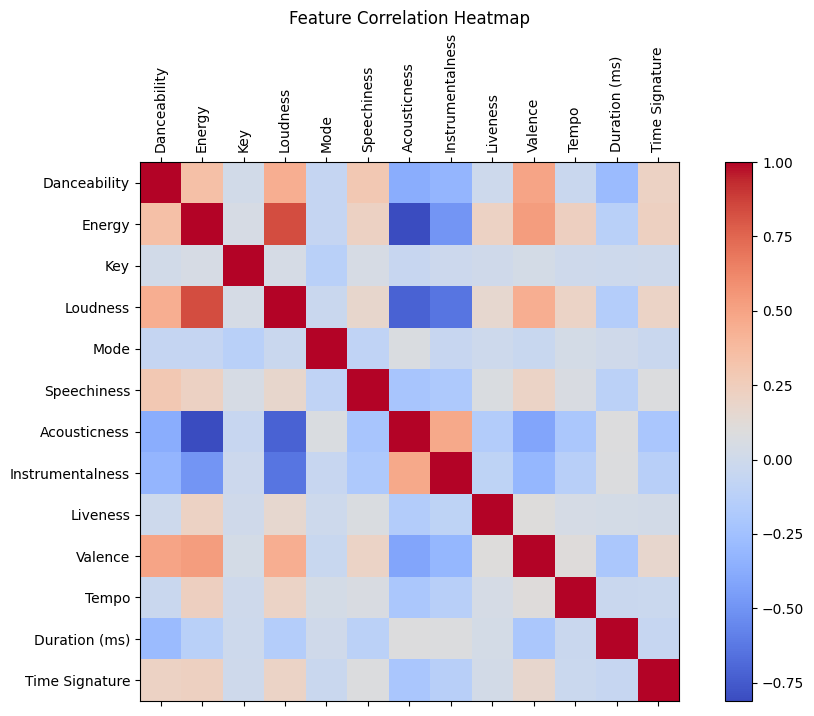

In [56]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12,7))
cax = ax.matshow(corr, cmap='coolwarm')
plt.colorbar(cax)
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.title("Feature Correlation Heatmap")
plt.show()

<h2> Danceability V.S. Energy </h2>

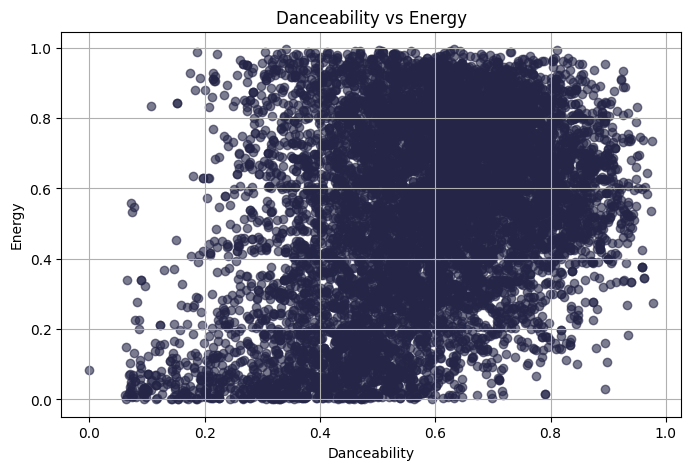

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(df['Danceability'], df['Energy'], alpha =0.6, color='#242547')
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

# Helps us understand the relationship between how danceable and energetic a song is

<h2> Popular Musical Keys </h2>

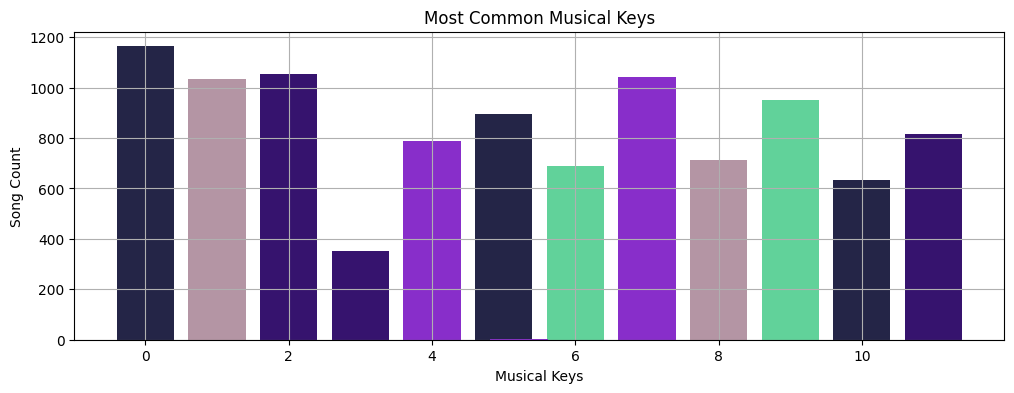

In [54]:
key_cont = df['Key'].value_counts()
plt.figure(figsize=(12,4))
plt.bar(key_cont.index, key_cont.values, color=('#242547', '#36136E', '#882ECA', '#B495A4', '#61D29A'))
plt.title('Most Common Musical Keys')
plt.xlabel('Musical Keys')
plt.ylabel('Song Count')
plt.grid(True)
plt.show()

# Self explanatory :)

<h2> Loudness Distribution </h2>

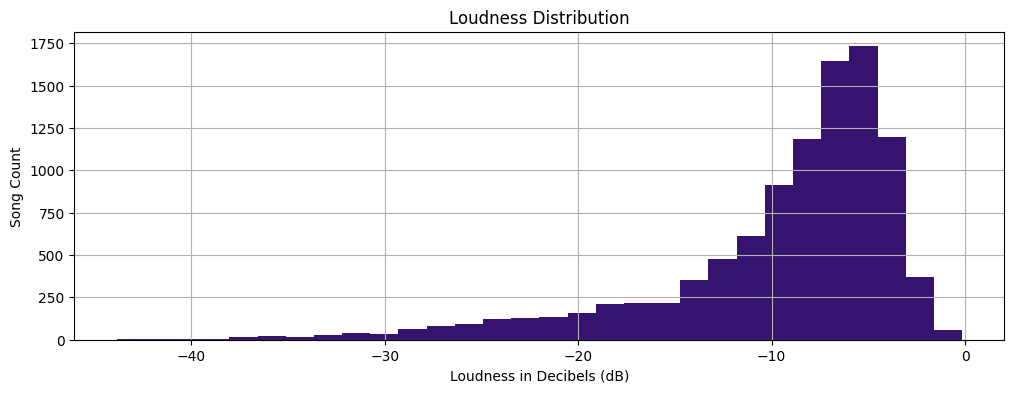

In [53]:
plt.figure(figsize=(12,4))
plt.hist(df['Loudness'], bins=30, color='#36136E')
plt.title('Loudness Distribution')
plt.xlabel('Loudness in Decibels (dB)')
plt.ylabel('Song Count')
plt.grid(True)
plt.show()

# Shows how loud most songs are in decibels (dB)

<h2> Speechiness V.S. Acousticness

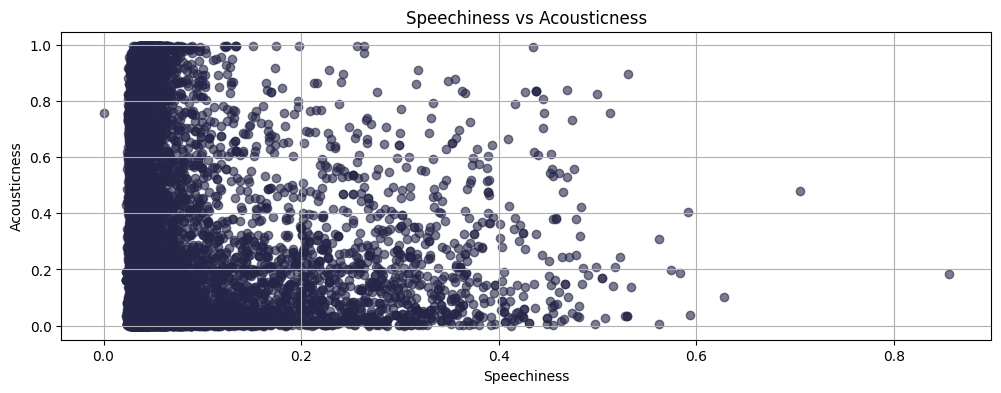

In [52]:
plt.figure(figsize=(12,4))
plt.scatter(df['Speechiness'], df['Acousticness'], alpha =0.6, color='#242547')
plt.title('Speechiness vs Acousticness')
plt.xlabel('Speechiness')
plt.ylabel('Acousticness')
plt.grid(True)
plt.show()

# Analyzes how much speech based contents relates to how acoustic a song is

<h2> Tempo Distribution </h2>

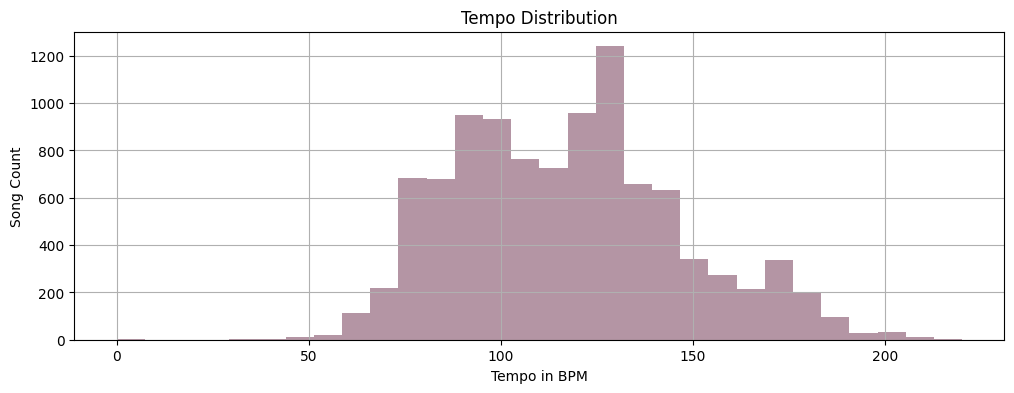

In [51]:
plt.figure(figsize=(12,4))
plt.hist(df['Tempo'], bins=30, color='#B495A4')
plt.title('Tempo Distribution') 
plt.xlabel('Tempo in BPM')
plt.ylabel('Song Count')
plt.grid(True)
plt.show()

# Shows the BPM (beat per minutos) range of most songs

<h2> Valence Value Across Genres </h2>

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_6048\1869856348.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vlnc, labels=gnr, showfliers=False)


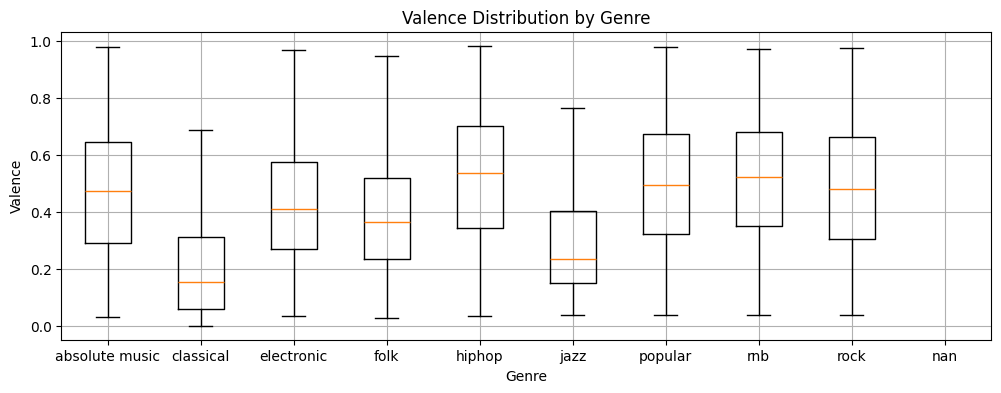

In [57]:
gnr = df['Genre'].unique()
vlnc = [df[df['Genre'] == Genre]['Valence'].dropna() for Genre in gnr]
plt.figure(figsize=(12,4))
plt.boxplot(vlnc, labels=gnr, showfliers=False)
plt.title('Valence Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Valence')
plt.grid(True)
plt.show()

# Compares the mood of the songs across multiple genres

<h2> Duration of Songs </h2>

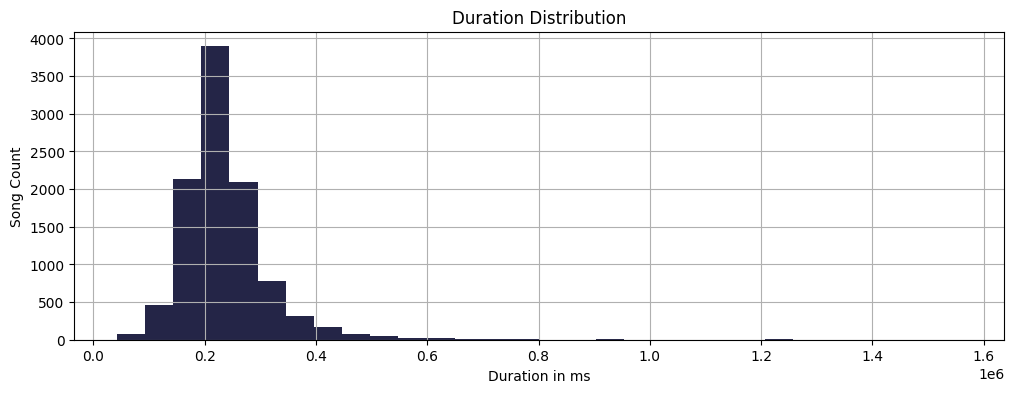

In [58]:
plt.figure(figsize=(12,4))
plt.hist(df['Duration (ms)'], bins=30, color='#242547')
plt.title('Duration Distribution')
plt.xlabel('Duration in ms')
plt.ylabel('Song Count')
plt.grid(True)
plt.show()


## Tempo vs Energy

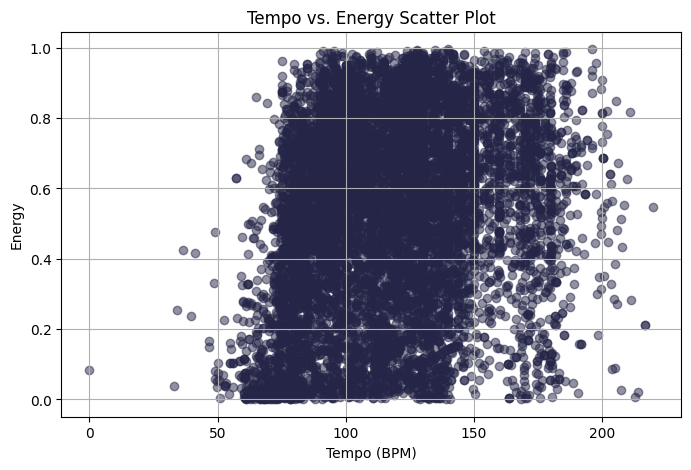

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Tempo'], df['Energy'], alpha=0.5, color='#242547')
plt.xlabel("Tempo (BPM)")
plt.ylabel("Energy")
plt.title("Tempo vs. Energy Scatter Plot")
plt.grid(True)
plt.show()

## Danceability vs Loudness

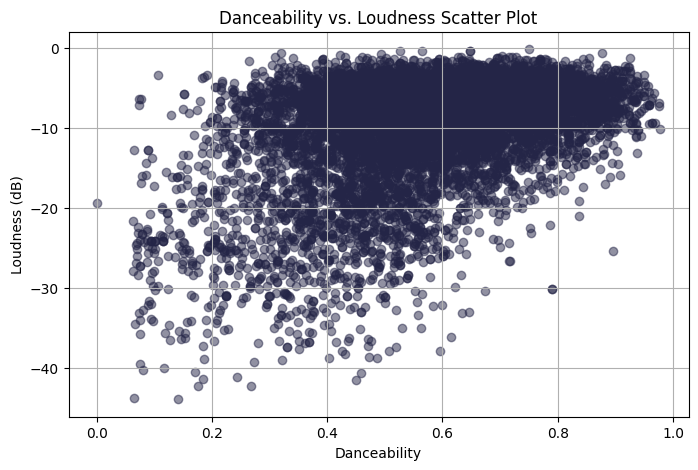

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Danceability'], df['Loudness'], alpha=0.5, color='#242547')
plt.xlabel("Danceability")
plt.ylabel("Loudness (dB)")
plt.title("Danceability vs. Loudness Scatter Plot")
plt.grid(True)
plt.show()

## Tempo vs Valence

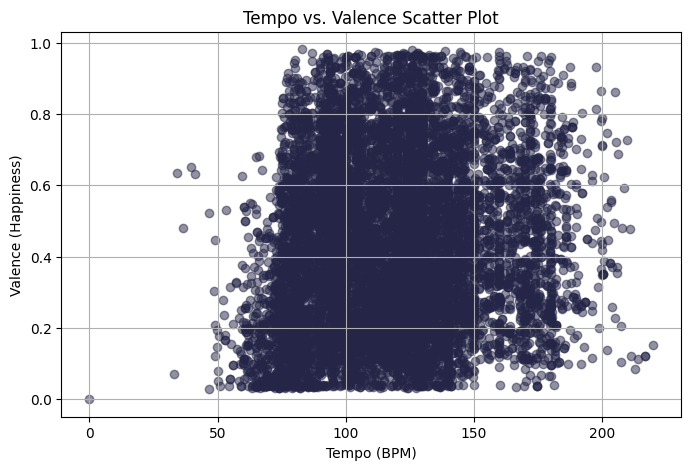

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Tempo'], df['Valence'], alpha=0.5, color='#242547')
plt.xlabel("Tempo (BPM)")
plt.ylabel("Valence (Happiness)")
plt.title("Tempo vs. Valence Scatter Plot")
plt.grid(True)
plt.show()

## Duration vs Energy

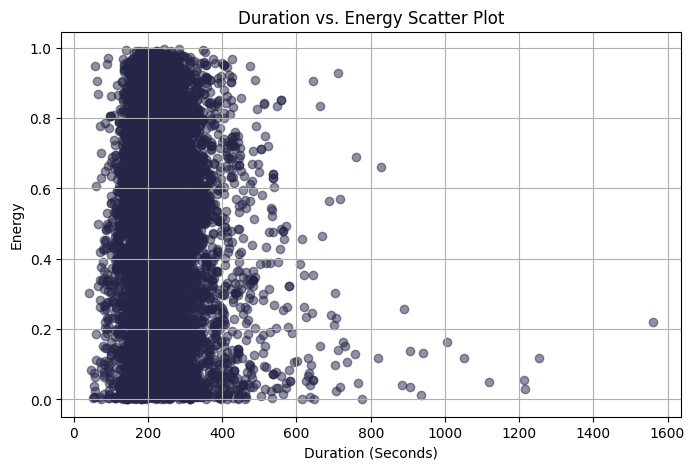

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Duration (ms)'] / 1000, df['Energy'], alpha=0.5, color='#242547')
plt.xlabel("Duration (Seconds)")
plt.ylabel("Energy")
plt.title("Duration vs. Energy Scatter Plot")
plt.grid(True)
plt.show()

## Loudness vs Energy

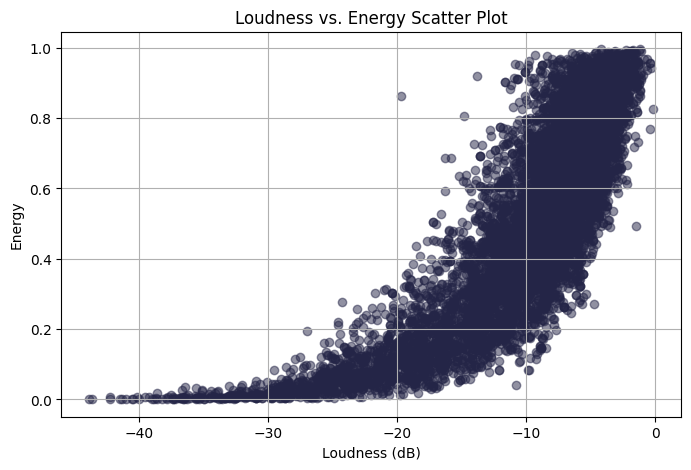

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Loudness'], df['Energy'], alpha=0.5, color='#242547')
plt.xlabel("Loudness (dB)")
plt.ylabel("Energy")
plt.title("Loudness vs. Energy Scatter Plot")
plt.grid(True)
plt.show()

## Average Tempo per Key

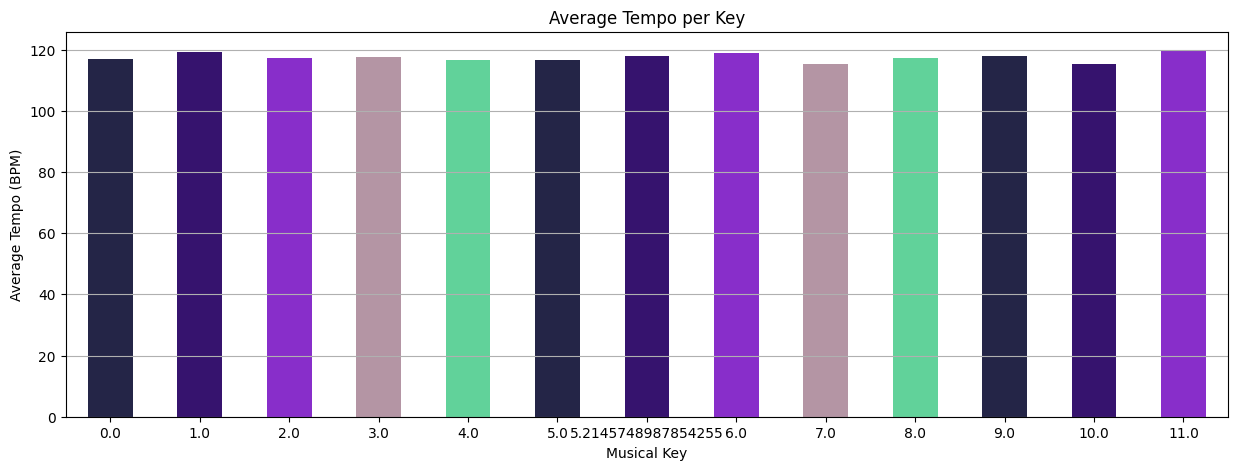

In [36]:
plt.figure(figsize=(15, 5))
df.groupby('Key')['Tempo'].mean(round(2)).plot(kind='bar', color=('#242547', '#36136E', '#882ECA', '#B495A4', '#61D29A'))
plt.xlabel("Musical Key")
plt.ylabel("Average Tempo (BPM)")
plt.title("Average Tempo per Key")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Average Loudness per Genre

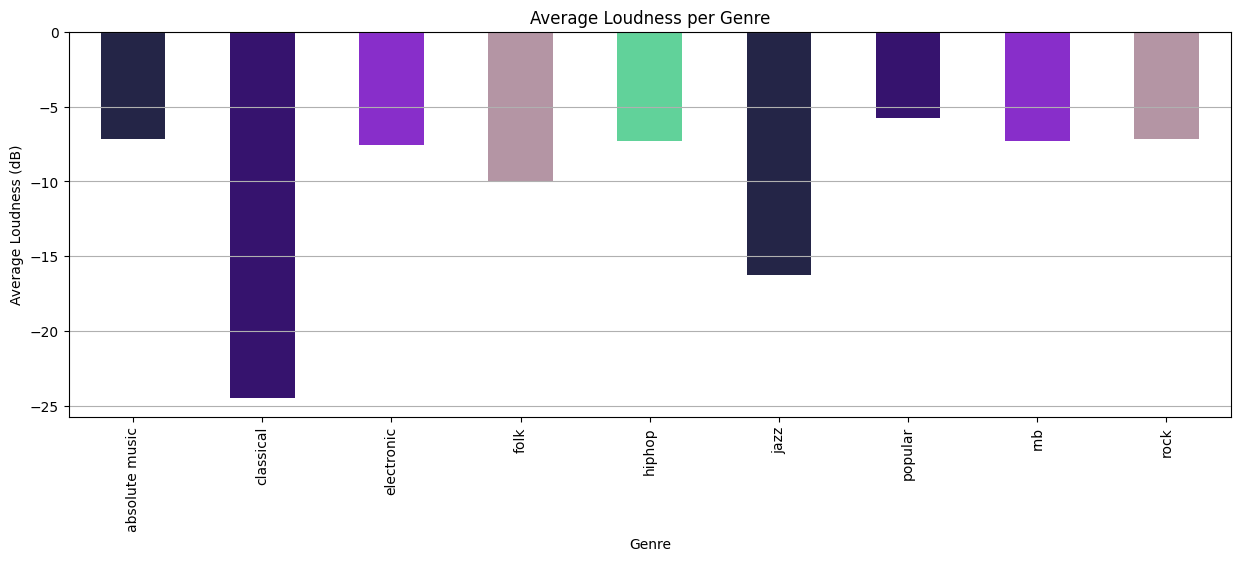

In [35]:
plt.figure(figsize=(15, 5))
df.groupby('Genre')['Loudness'].mean().plot(kind='bar', color=('#242547', '#36136E', '#882ECA', '#B495A4', '#61D29A'))
plt.xlabel("Genre")
plt.ylabel("Average Loudness (dB)")
plt.title("Average Loudness per Genre")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

## Key vs Mode (Major/Minor)

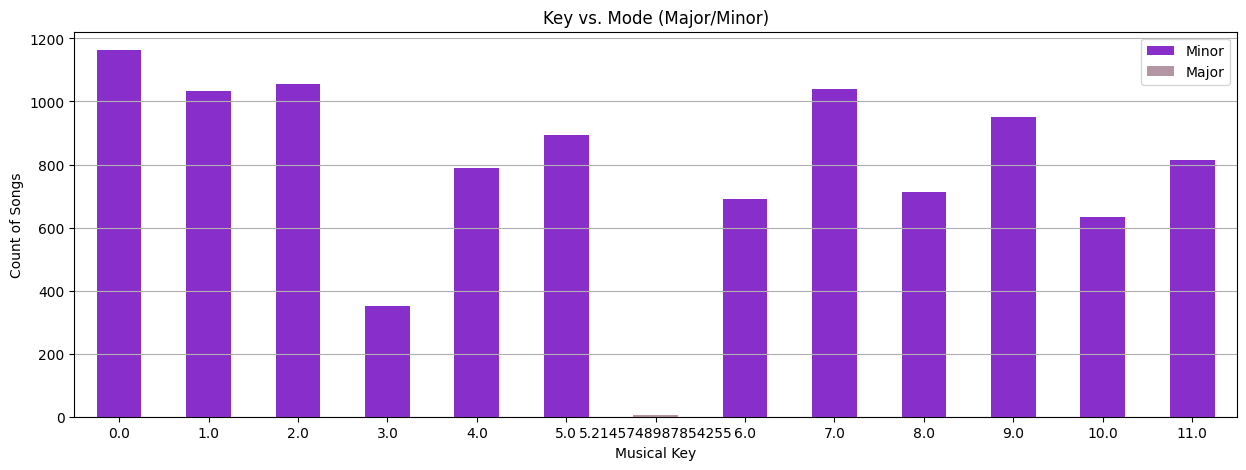

In [34]:
df.groupby(['Key', 'Mode']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5), color=['#882ECA', '#B495A4'])
plt.xlabel("Musical Key")
plt.ylabel("Count of Songs")
plt.title("Key vs. Mode (Major/Minor)")
plt.legend(["Minor", "Major"])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Genre vs Mode (Major/Minor)

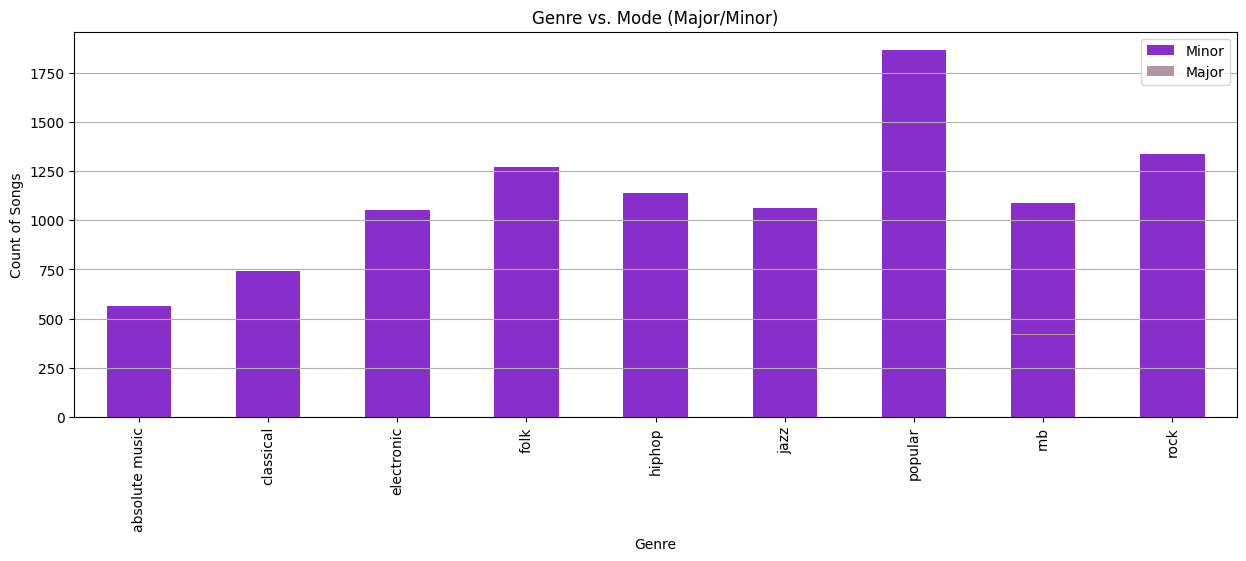

In [33]:
df.groupby(['Genre', 'Mode']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5), color=['#882ECA', '#B495A4'])
plt.xlabel("Genre")
plt.ylabel("Count of Songs")
plt.title("Genre vs. Mode (Major/Minor)")
plt.legend(["Minor", "Major"])
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()